In [2]:
# import lib
import math
import pandas as pd
import numpy as np
# import tensorflow as tf

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
import matplotlib.pyplot as plt

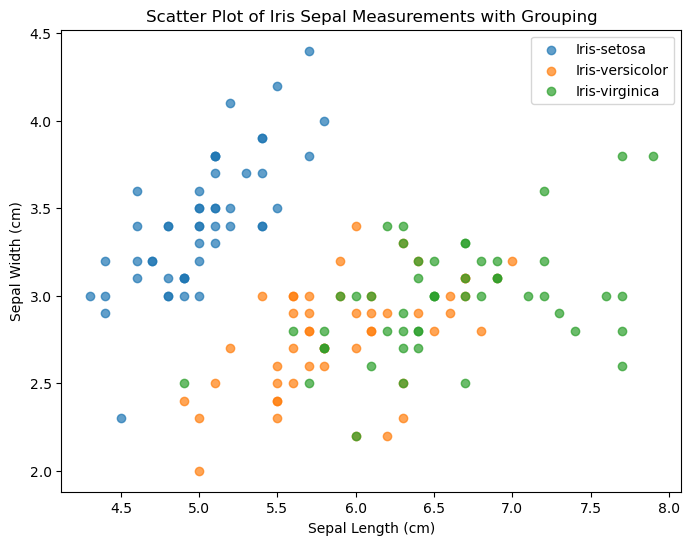

In [18]:
# Edftract df
sepal_length = df["SepalLengthCm"]
sepal_width = df["SepalWidthCm"]
groups = df["Species"]

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Scatter plot with different colors for groups
for group in groups.unique():
    subset = df[df["Species"] == group]
    plt.scatter(subset["SepalLengthCm"], subset["SepalWidthCm"], label=group, alpha=0.7)

# Add labels and title (modify if needed)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Scatter Plot of Iris Sepal Measurements with Grouping")

# Add legend
plt.legend()

# Show the plot
plt.show()


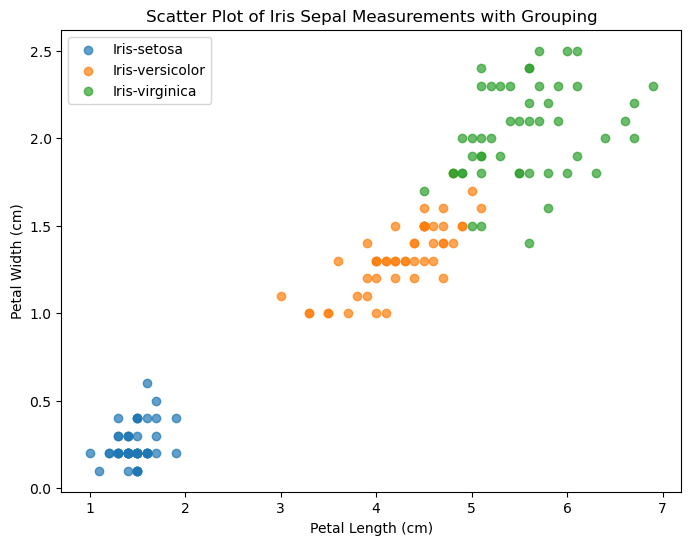

In [19]:
# Edftract df
sepal_length = df["PetalLengthCm"]
sepal_width = df["PetalWidthCm"]
groups = df["Species"]

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Scatter plot with different colors for groups
for group in groups.unique():
    subset = df[df["Species"] == group]
    plt.scatter(subset["PetalLengthCm"], subset["PetalWidthCm"], label=group, alpha=0.7)

# Add labels and title (modify if needed)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Scatter Plot of Iris Sepal Measurements with Grouping")

# Add legend
plt.legend()

# Show the plot
plt.show()


In [20]:
y = df['Species']
X = df.drop(['Species'],axis= 1)

In [21]:
X = X.drop(['Id'],axis=1)

In [22]:
X = X.to_numpy(dtype=np.float32)  # Convert all elements to float32


In [23]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [28]:
def euclidean_distance(p1, p2):
  distance = 0
  for i in range(len(p1)):
    distance += (p1[i] - p2[i])**2
  return math.sqrt(distance)

In [29]:
def knn_predict(data, target, new_point, k):
  distances = []
  for i in range(len(data)):
    distance = euclidean_distance(data[i], new_point)
    distances.append((distance, target[i]))  # Store distance and target label

  # Sort distances based on ascending distance
  distances.sort(key=lambda x: x[0])

  # Get k nearest neighbors' labels
  k_nearest_labels = [label for distance, label in distances[:k]]

  # Determine most frequent class label among k neighbors
  from collections import Counter
  label_counts = Counter(k_nearest_labels)
  most_frequent_label = label_counts.most_common(1)[0][0]

  return most_frequent_label

In [36]:
new_point = [5, 4, 6,2]
k = 20

predicted_label = knn_predict(X, y, new_point, k)
print("Predicted label for the new point:", predicted_label)

Predicted label for the new point: Iris-virginica
